In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [6]:
data=pd.read_csv('train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Types of features
##### (categorical : sex and Embarked ) (continuous : age , fair) ( discrete : SibSp,parch) (alphanumeric: cabin,ticket) 


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


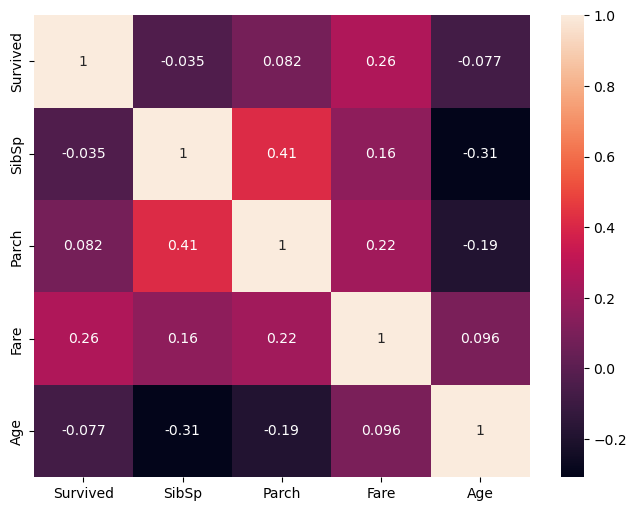

In [11]:
plt.figure(figsize=(8,6))
heatmap=sns.heatmap(data[["Survived" , "SibSp" ,"Parch","Fare","Age"]].corr(),annot=True)

# SibSp

In [14]:
#data["SibSp"].nunique()
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

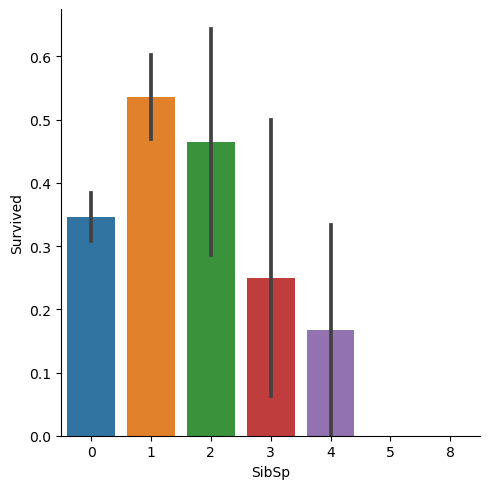

In [21]:
sns.catplot(x="SibSp",y="Survived",data=data,kind="bar")

# Age

C:\Users\satya\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\satya\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


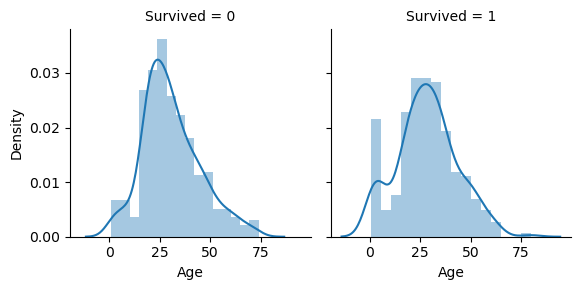

In [25]:
age_visual=sns.FacetGrid(data,col="Survived")
age_visual=age_visual.map(sns.distplot,'Age')

# Gender



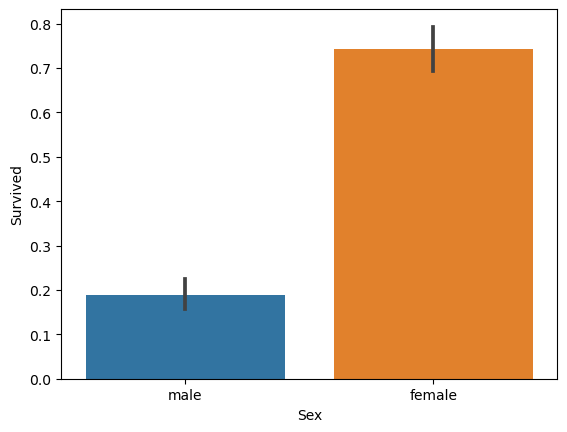

In [27]:
sex_plot=sns.barplot(x="Sex",y="Survived",data=data)

In [29]:
data[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


# PClass

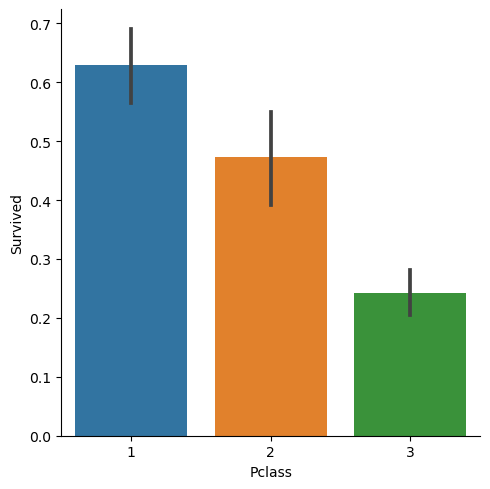

In [36]:
pclass=sns.catplot(x="Pclass",y="Survived",data=data,kind="bar")

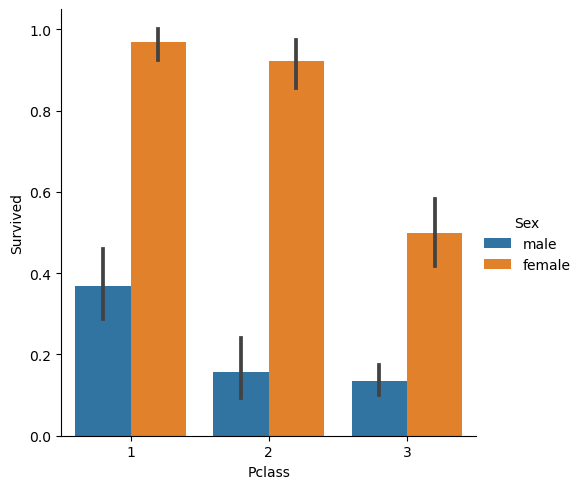

In [37]:
pclass=sns.catplot(x="Pclass",y="Survived",data=data,kind="bar",hue="Sex")

# Embarked

In [38]:
data["Embarked"].isnull().sum()

2

In [40]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
data["Embarked"]=data["Embarked"].fillna('S')

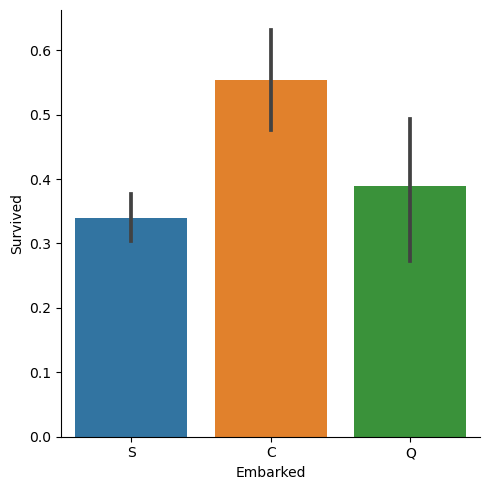

In [42]:
q=sns.catplot(x="Embarked",y="Survived",data=data,kind="bar")

# preparing the data

In [43]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
mean=data["Age"].mean()
std=data["Age"].std()
isnull=data["Age"].isnull().sum()

print(mean,std,isnull)

29.69911764705882 14.526497332334044 177


In [50]:
rand_age=np.random.randint(mean-std, mean+std, size=isnull)

In [51]:
a=data["Age"].copy()
a[np.isnan(a)]=rand_age
data["Age"]=a

In [52]:
data["Age"].isnull().sum()

0

In [53]:
data["Embarked"]=data["Embarked"].fillna('S')

In [54]:
col_to_drop=["PassengerId","Cabin","Ticket","Name"]
data.drop(col_to_drop,axis=1,inplace=True)

In [58]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
5,0,3,0,18.0,0,0,8.4583,Q
6,0,1,0,54.0,0,0,51.8625,S
7,0,3,0,2.0,3,1,21.0750,S
8,1,3,1,27.0,0,2,11.1333,S
9,1,2,1,14.0,1,0,30.0708,C


In [56]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [57]:
genders={"male":0,"female":1}
data["Sex"]=data["Sex"].map(genders)

In [59]:
ports={"S":0,"C":1,"Q":2}
data["Embarked"]=data["Embarked"].map(ports)

In [60]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Spliting the data

In [71]:
x=data.drop(data.columns[[0]],axis=1)
y=data["Survived"]

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


# Classification

In [80]:
lr=LogisticRegression()
svc_classifier=SVC()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier(5)
rf=RandomForestClassifier(n_estimators=1000)

In [81]:
lr.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [82]:
lr_pred = lr.predict(x_test)
svc_classifier_pred = svc_classifier.predict(x_test)
dt_pred = dt.predict(x_test)
knn_pred = knn.predict(x_test)
rf_pred = rf.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score

lr_acc=accuracy_score(y_test,lr_pred)
svc_classifier_acc=accuracy_score(y_test,svc_classifier_pred)
dt_acc=accuracy_score(y_test,dt_pred)
knn_acc=accuracy_score(y_test,knn_pred)
rf_acc=accuracy_score(y_test,rf_pred)

In [84]:
print("logistic regresson :",round(lr_acc*100,2))
print("support vector     :",round(svc_classifier_acc*100,2))
print("decision tree      :",round(dt_acc*100,2))
print("KNN                :",round(knn_acc*100,2))
print("random forest      :",round(rf_acc*100,2))

logistic regresson : 81.72
support vector     : 81.34
decision tree      : 75.75
KNN                : 80.22
random forest      : 82.09
